<a href="https://colab.research.google.com/github/carlos-navarro-naranjo/Linear-Classification-using-the-perceptron-Learning-Rule/blob/main/Linear_Classification_using_the_perceptron_Learning_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###Linear Classification using the Perceptron Learning Rule- SEPARABLE DATA

My model employs the perceptron learning rule to train a linear classifier on a two feature engine condition binary classification. I use simulated engine condition data for use in triggering time-to-failure 
calculations

My model's Learning goal: create the “trigger” by 
finding a good classifier and using it as 
a boundary to sound the alarm problem. 

Our model deals with 2 features, engine variable 1 and engine variable 2.
 

In terms of built-in python libraries, I used pandas to load our .csv files, numpy to handle arrays and matrix mathematics, matplotlib.pyplot for plotting, and sklearn for a variety of machine learning tasks and confusion matrix visualization.

I begin by reading in our small engine condition dataset with pandas. 

I then plot the data in a scatterplot using matplotlib.pyplot and numpy. The scatterplot is of engine condition plotted as a function of two engine variables, referred to here as engine variable 1 and engine variables 2.

Here I rely on knowledge that the first 16 data points are from the "Good" class and the remaining points are from the "Diminished" class. This makes it easier to plot.

In [ ]:
##LINEARLY SEPARABLE DATA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Engine_Condition (1).csv")
#df
print(df)
feature_names = ['EV1', 'EV2']
X = df[feature_names]
y = df['Status']
df_arr = np.array(df)
print(df_arr)
df_arr = df_arr[0:34, :]
D1 = df_arr[0:15, :]
D0 = df_arr[15:34,:]


[5.2  5.6  5.77 5.85 5.61 5.63 5.84 5.85 5.86 5.86 5.92 5.93 5.91 6.15
 6.21] [3.4  3.55 3.43 3.61 4.2  4.52 3.57 4.23 4.25 4.4  3.73 4.32 4.51 4.55
 4.49]


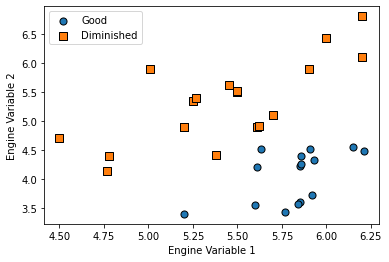

In [7]:
plt.scatter(D1[:, 0], D1[:, 1], marker='o', s=50, edgecolor='k', label='Good')
plt.scatter(D0[:, 0], D0[:, 1], marker='s', s=50, edgecolor='k', label='Diminished')
print(D1[:, 0], D1[:, 1])
plt.xlabel("Engine Variable 1")
plt.ylabel("Engine Variable 2")
plt.legend()

Now that I have set up a linear classifier with the perceptron learning rule, we will use it on the engine data again but with the standard training/testing split for holdout validation. There is not much data in the set, so k-fold cross validation arguably would be the better choice in practice. But I decided to keep it simple for this miniproject.

Below, I use sklearn.model_selection for train_test_split. I set a random state just to make sure the results can be repeated.

After I train the classifier, I plot the decision boundary and the complete data set.

[0.1, 1.4929999999999986, -1.8540000000000003]


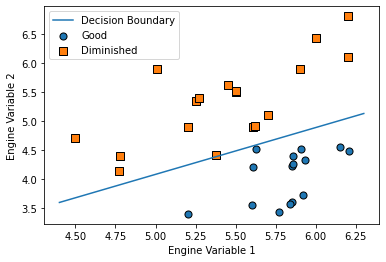

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_arr[:, 0:2], df_arr[:, 2], random_state=42)

l_rate = 0.1
n_epoch = 12
weights, accuracy = train_weights(np.hstack((X_train, y_train.reshape(-1, 1))), l_rate, n_epoch)
print(weights)

# plot the actual boundary
x1 = np.linspace(4.4, 6.3, num=2)
x2 = - weights[0]/weights[2] - weights[1]/weights[2]*x1

plt.figure()
plt.scatter(D1[:, 0], D1[:, 1], marker='o', s=50, edgecolor='k', label='Good')
plt.scatter(D0[:, 0], D0[:, 1], marker='s', s=50, edgecolor='k', label='Diminished')
plt.plot(x1, x2, label='Decision Boundary')
plt.xlabel("Engine Variable 1")
plt.ylabel("Engine Variable 2")
plt.legend()

I now seek to plot the confusion matrix.

Scikit-learn provides a class called ConfusionMatrixDisplay that makes it easy to visualize a confusion matrix. 

ConfusionMatrixDisplay is a class that has what are called class methods (python keyword classmethod). These are methods that can be used without constructing an object of that class.
They can be referenced using the classname. I will use the method from_predictions, which we call as ConfusionMatrixDisplay.from_predictions(y_true, y_pred).

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00         7
  Diminished       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



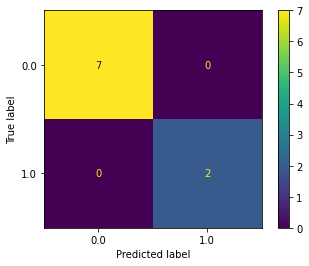

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

train = np.hstack((X_test, y_test.reshape(-1, 1)))

y_pred = []
y_true = []
for row in train:
    y_pred.append(predict(row, weights))
    y_true.append(row[-1])

    
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

target_names = ['Good', 'Diminished']
print(classification_report(y_true, y_pred, target_names=target_names))